Train and Test Model Using Data Set

Accuracy K-Nearest Neighbors: 97.85%
Classification Report: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       771
           1       0.98      0.98      0.98       670

    accuracy                           0.98      1441
   macro avg       0.98      0.98      0.98      1441
weighted avg       0.98      0.98      0.98      1441



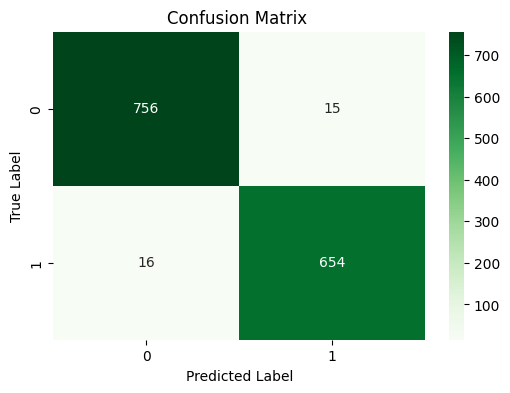

Accuracy XGBoost: 98.61%
Classification Report: XGBoost
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       771
           1       0.98      0.99      0.99       670

    accuracy                           0.99      1441
   macro avg       0.99      0.99      0.99      1441
weighted avg       0.99      0.99      0.99      1441



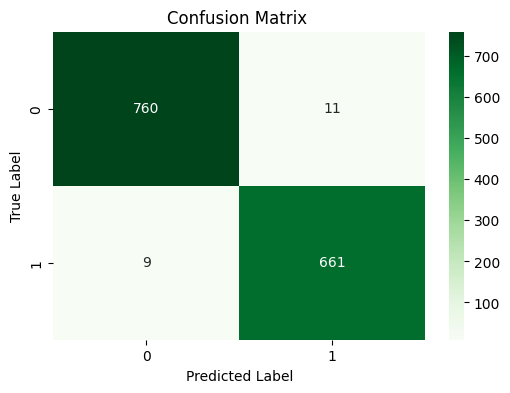

Accuracy Random Forest: 98.68%
Classification Report: Random Forest
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       771
           1       0.98      0.99      0.99       670

    accuracy                           0.99      1441
   macro avg       0.99      0.99      0.99      1441
weighted avg       0.99      0.99      0.99      1441



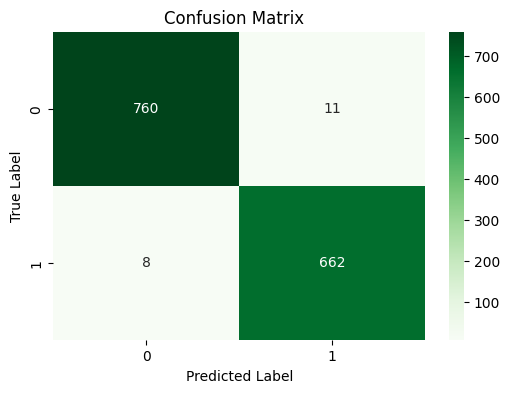

[LightGBM] [Info] Number of positive: 2931, number of negative: 2830
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001520 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 5761, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508766 -> initscore=0.035067
[LightGBM] [Info] Start training from score 0.035067
Accuracy LightGBM: 98.75%
Classification Report: LightGBM
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       771
           1       0.99      0.99      0.99       670

    accuracy                           0.99      1441
   macro avg       0.99      0.99      0.99      1441
weighted avg       0.99      0.99      0.99      1441



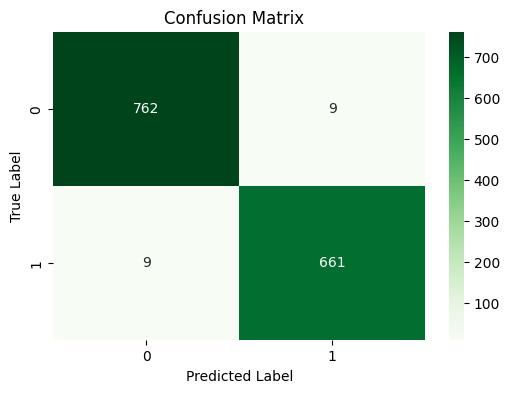

Accuracy MLP: 94.93%
Classification Report: MLP
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       771
           1       0.91      0.99      0.95       670

    accuracy                           0.95      1441
   macro avg       0.95      0.95      0.95      1441
weighted avg       0.95      0.95      0.95      1441



c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


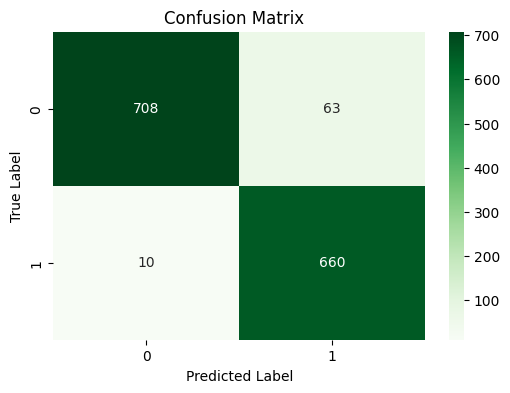

Accuracy Support Vector Machine: 76.82%
Classification Report: Support Vector Machine
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       771
           1       0.72      0.81      0.77       670

    accuracy                           0.77      1441
   macro avg       0.77      0.77      0.77      1441
weighted avg       0.77      0.77      0.77      1441



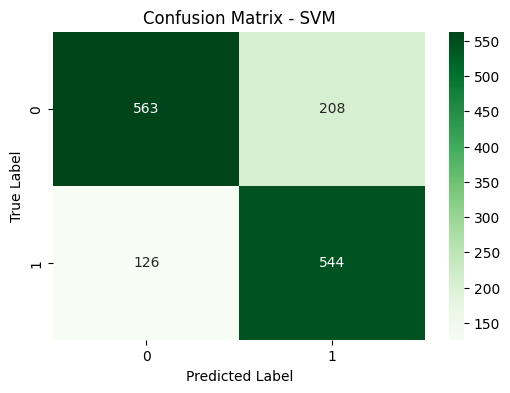

In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report


# Load the dataset
file_path = 'Datasets/New_Final_Dataset.csv'
df = pd.read_csv(file_path)

# Assuming 'Label' is the column indicating whether it's a in or not
X = df.drop(['Label'], axis=1)  # Features
y = df['Label']  # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=255)


##############################################K-Nearest Neighbors (KNN)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy K-Nearest Neighbors: {accuracy_knn:.2%}")

# Display classification report
print("Classification Report: K-Nearest Neighbors")
print(classification_report(y_test, y_pred_knn))


##mat
# Generate confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Visualize the confusion matrix 
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

########################################################XGBoost (Extreme Gradient Boosting)

# Initialize the XGBoost classifier
xgb = XGBClassifier()

# Train the XGBoost model
xgb.fit(X_train, y_train)

# Make predictions on the test set using XGBoost
y_pred_xgb = xgb.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy XGBoost: {accuracy_xgb:.2%}")

# Display classification report
print("Classification Report: XGBoost")
print(classification_report(y_test, y_pred_xgb))

#mat
# Generate confusion matrix
conf_matrix_XG = confusion_matrix(y_test, y_pred_xgb)

# Visualize the confusion matrix 
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_XG, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#########################################################Random Forest 

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier()

# Train the Random Forest model
random_forest.fit(X_train, y_train)

# Make predictions on the test set using Random Forest
y_pred_rf = random_forest.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Random Forest: {accuracy_rf:.2%}")

# Display classification report
print("Classification Report: Random Forest")
print(classification_report(y_test, y_pred_rf))

######MAT
# Generate confusion matrix
conf_matrix_rff = confusion_matrix(y_test, y_pred_rf)

# Visualize the confusion matrix 
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rff, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix  ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


######################################################LightGBM (Light Gradient Boosting Machine)

# Initialize the LightGBM classifier
lgbm = LGBMClassifier()

# Train the LightGBM model
lgbm.fit(X_train, y_train)

# Make predictions on the test set using LightGBM
y_pred_lgbm = lgbm.predict(X_test)

# Evaluate the LightGBM model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"Accuracy LightGBM: {accuracy_lgbm:.2%}")

# Display classification report
print("Classification Report: LightGBM")
print(classification_report(y_test, y_pred_lgbm))

#####MAT
# Generate confusion matrix
conf_matrix_lg = confusion_matrix(y_test, y_pred_lgbm)

# Visualize the confusion matrix 
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lg, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix  ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



#########################MLP
# Initialize the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, alpha=0.0001,
                    solver='adam', random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp = mlp.predict(X_test)

# Evaluate the model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Accuracy MLP: {accuracy_mlp:.2%}")

# Display classification report
print("Classification Report: MLP")
print(classification_report(y_test, y_pred_mlp))

####MAT
# Generate confusion matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

# Visualize the confusion matrix 
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix  ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


###################SVM
# Initialize the SVM classifier
svm = SVC(kernel='linear')

# Train the model
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy Support Vector Machine: {accuracy_svm:.2%}")

# Display classification report
print("Classification Report: Support Vector Machine")
print(classification_report(y_test, y_pred_svm))

# Generate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Visualize the confusion matrix 
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



Cross Validation

In [87]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC 

# Load the dataset
file_path = 'Datasets/New_Final_Dataset.csv'
df = pd.read_csv(file_path)

# Assuming 'Label' is the column indicating whether it's a in or not
X = df.drop(['Label'], axis=1)  # Features
y = df['Label']  # Labels

# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'MLP': MLPClassifier(),
    'LightGBM': LGBMClassifier(),
    'SVM': SVC()  
}

# Perform cross-validation for each classifier
for clf_name, clf in classifiers.items():
    scores = cross_val_score(clf, X, y, cv=5)
    print(f"{clf_name}:")
    print("Cross-Validation Scores:", scores)
    print("Mean Accuracy:", scores.mean())
    print()

KNN:
Cross-Validation Scores: [0.9722415  0.79528105 0.75208333 0.8125     0.83194444]
Mean Accuracy: 0.8328100663119746

Random Forest:
Cross-Validation Scores: [0.9722415  0.79944483 0.76041667 0.76805556 0.72569444]
Mean Accuracy: 0.8051705991209808

XGBoost:
Cross-Validation Scores: [0.97154754 0.80360861 0.77013889 0.78194444 0.66111111]
Mean Accuracy: 0.79767011720256



c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

MLP:
Cross-Validation Scores: [0.96183206 0.78001388 0.73402778 0.72152778 0.70069444]
Mean Accuracy: 0.7796191880638446

[LightGBM] [Info] Number of positive: 2880, number of negative: 2881
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000918 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 5761, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499913 -> initscore=-0.000347
[LightGBM] [Info] Start training from score -0.000347
[LightGBM] [Info] Number of positive: 2881, number of negative: 2880
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002478 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 5761, number of used features: 17
[LightGBM] [Info] [binary:Boos

Test Model with Data Set 

Save  Model

In [88]:
import pickle

# Save the trained model to a file
model_filename = 'Model/mountain_climbing_model.pkl'

with open(model_filename, 'wb') as model_file:
    pickle.dump(svm, model_file)

print(f"Model saved as {model_filename}")

Model saved as Model/mountain_climbing_model.pkl


Test for  Another Dataset

Accuracy: 0.78
Confusion Matrix:


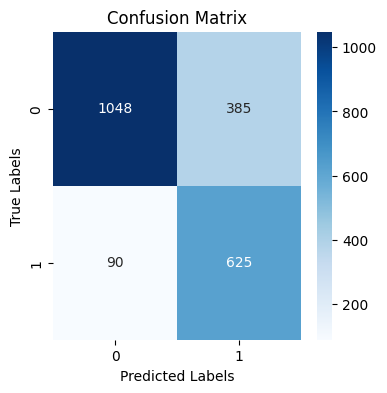

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.82      1433
           1       0.62      0.87      0.72       715

    accuracy                           0.78      2148
   macro avg       0.77      0.80      0.77      2148
weighted avg       0.82      0.78      0.79      2148



In [89]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns

model_path = 'Model/mountain_climbing_model.pkl'
model = pickle.load(open(model_path, 'rb'))

file_path = 'New Data/Processed_Dataset(PULL).csv'
df = pd.read_csv(file_path)

X = df.drop('Label', axis=1)
y = df['Label']

y_pred = model.predict(X)

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

class_report = classification_report(y, y_pred)
print("Classification Report:")
print(class_report)

Roc curve

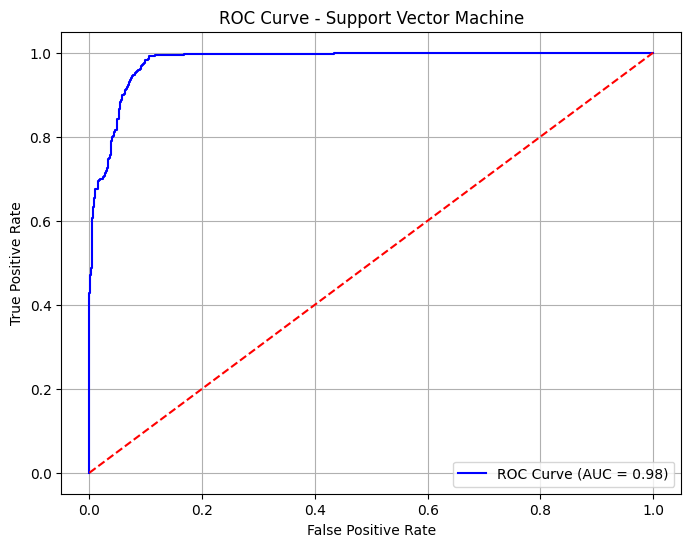

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC 
# Initialize the SVM classifier with probability estimation enabled
svm = SVC(probability=True)

# Train the SVM model
svm.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_pred_proba_svm = svm.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm)

# Calculate AUC score
auc_score_svm = roc_auc_score(y_test, y_pred_proba_svm)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', label=f'ROC Curve (AUC = {auc_score_svm:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Support Vector Machine')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()